In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
import cv2
import matplotlib.image
from glob import glob
import torch
from model_factory import get_model
import argparse
from model_factory import UNet

In [2]:
"""configurations"""
device = torch.device("cuda:0")
config_path = "/root/autoencoder_denoiser/configs_large_batch"
exp_dir = '/root/autoencoder_denoiser/exps/results_large_batch'

class Test():
    def __init__(self, model_name, 
                    config_path = config_path,
                    exp_dir = exp_dir) -> None:
        self.dilation = False
        self.resize = True
        self.config = None
        name = model_name
        self.name = name

        f = open(f'{config_path}/'+ name + '.json')
        self.config = json.load(f)
        experiment_path = f"{exp_dir}/{name}/" 
        print('load from: ', os.path.join(experiment_path, 'latest_model.pt'))
        state_dict = torch.load(os.path.join(experiment_path, 'latest_model.pt'))
        model = get_model(self.config)
        # try:
        model.load_state_dict(state_dict['model'])
        model = torch.nn.DataParallel(model)
        # except:
        #     model = torch.nn.DataParallel(model)
        #     model.load_state_dict(state_dict['model'])
            
        model.to(device)
        model.eval()
        self.model = model

        
# my_model_test = Test("t1_03")
# paper_1d_test = Test("paper_1d")




In [74]:
dann_test = Test('dann')
cdan_test = Test('cdan')
cdan_e_test=  Test('cdan_e')

load from:  /root/autoencoder_denoiser/exps/results_large_batch/dann/latest_model.pt
model: Adv_Unet
load from:  /root/autoencoder_denoiser/exps/results_large_batch/cdan/latest_model.pt
model: Adv_Unet
load from:  /root/autoencoder_denoiser/exps/results_large_batch/cdan_e/latest_model.pt
model: Adv_Unet


In [5]:
# img_dir = "/root/autoencoder_denoiser/dataset/real_img_referral_for_testing"
# clean_dir = os.path.join(img_dir, "real_hsqc_clean")
# noisy_dir = os.path.join(img_dir, "real_hsqc_noisy")
# criterion = torch.nn.MSELoss()
# clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
# custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)

# for img_path in glob(noisy_dir+"/*"):
#     img = Image.open(img_path)
#     img = np.array(img)
    
#     plt.imshow(img,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
    
#     # print(img.shape)
#     plus = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
#     minus = 1-img[:,:, 2]/255
#     # print(plus.shape)
#     img_result = plus-minus
#     resized = cv2.resize(img_result.astype("float32"), (120, 180))
#     img_input = torch.tensor(img_result).unsqueeze(0).unsqueeze(0).float().to(device)
    
#     gound_path = img_path.replace("real_hsqc_noisy","real_hsqc_clean").replace("_HSQC_noisy","_HSQC_original")
#     gound_path = gound_path[:-5] + '1.png'
#     print(gound_path)
#     img = Image.open(gound_path)
#     img = np.array(img)
#     plus_groud = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
#     minus_groud = 1-img[:,:, 2]/255
#     groud_truth = plus_groud - minus_groud
    
#     plt.imshow(groud_truth,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
#     groud_truth = torch.tensor(groud_truth).unsqueeze(0).unsqueeze(0).float().to(device)
#     # print(img_input.shape)
    
#     denoised_1 = my_model_test.model.forward(img_input)
#     loss_1 = criterion(denoised_1,groud_truth )
#     denoised_1 = denoised_1[0,0].cpu().detach().numpy()   
#     plt.imshow(denoised_1,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
#     denoised_2 = paper_1d_test.model.forward(img_input)
#     loss_2 = criterion(denoised_2,groud_truth )
#     denoised_2 = denoised_2[0,0].cpu().detach().numpy()  
#     plt.imshow(denoised_2,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
    
#     print(f"loss of my_model is {loss_1} and previous paper model is {loss_2}")
#     break
    
# img_path

In [6]:
# img_dir = "/root/autoencoder_denoiser/dataset/real_img_referral_for_testing"
# clean_dir = os.path.join(img_dir, "real_hsqc_clean")
# noisy_dir = os.path.join(img_dir, "real_hsqc_noisy")
# criterion = torch.nn.MSELoss()
# clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
# custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)

# for img_path in glob(noisy_dir+"/*"):
#     img = Image.open(img_path)
#     img = np.array(img)
    
#     plt.imshow(img,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
    
#     '''input'''
#     # print(img.shape)
#     plus = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
#     minus = 1-img[:,:, 2]/255
#     # print(plus.shape)
#     img_result = plus-minus
#     resized = cv2.resize(img_result.astype("float32"), (120, 180))
#     img_input = torch.tensor(resized).unsqueeze(0).unsqueeze(0).float().to(device)
#     plt.imshow(resized,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
#     print(resized[resized<0])
    
#     '''ground truth'''
#     gound_path = img_path.replace("real_hsqc_noisy","real_hsqc_clean").replace("_HSQC_noisy","_HSQC_original")
#     gound_path = gound_path[:-5] + '1.png'
#     print(gound_path)
#     img = Image.open(gound_path)
#     img = np.array(img)
#     plus_groud = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
#     minus_groud = 1-img[:,:, 2]/255
#     ground_truth = plus_groud - minus_groud
#     ground_truth = cv2.resize(ground_truth.astype("float32"), (120, 180))
    
#     plt.imshow(ground_truth,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
#     ground_truth = torch.tensor(ground_truth).unsqueeze(0).unsqueeze(0).float().to(device)
#     # print(img_input.shape)
    
#     '''denoised 1 and 2'''
#     denoised_1 = my_model_test.model.forward(img_input)
#     loss_1 = criterion(denoised_1,ground_truth )
#     denoised_1 = denoised_1[0,0].cpu().detach().numpy()   
#     plt.imshow(denoised_1,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
#     denoised_2 = paper_1d_test.model.forward(img_input)
#     loss_2 = criterion(denoised_2,ground_truth )
#     denoised_2 = denoised_2[0,0].cpu().detach().numpy()  
#     plt.imshow(denoised_2,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
#     # print(my_model_test.model.module.inc.double_conv[0].weight.data)

#     print(f"loss of my_model is {loss_1} and previous paper model is {loss_2}")
#     break
    
# img_path

In [75]:
from hsqc_dataset import *
from tqdm import tqdm
'''creating test dataloader of real noise'''
config = dann_test.config
batch = config["dataset"]['batch_size']
shuffle=config["dataset"]['shuffle']

test_loader = DataLoader(RealNoiseDataset_Byeol(config), batch_size=2, shuffle=False, num_workers=1)

criterion = torch.nn.MSELoss(reduction="sum")
clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)
diff_clist = [(0,"green"), (0.5,"white"), (1, "red")]
custom_diff_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",diff_clist)


def test(*model_tests):
    for model_test in model_tests:
        displayed=0
        display_num = 0
        loss = 0
        with torch.no_grad():
            for iter, data in enumerate(tqdm(test_loader)):
                noise, raw = data
                if len(raw.shape)==3:   
                    raw, noise = raw.unsqueeze(1), noise.unsqueeze(1)
                raw, noise = raw.to(device).float(), noise.to(device).float()
                prediction = model_test.model.forward(noise)
                
                # find loss
                # prediction = prediction.type(torch.float32)
                ground_truth = raw
            
                # add adv loss !!!
                prediction = torch.clip(prediction,-1,1)

            # print(denoised_1.shape)
            # print(ground_truth.shape)
                loss += criterion(prediction,ground_truth )
            
            
            
                if displayed<5:
                    noise_pic , prediction_pic, raw_pic = noise[0],prediction[0], raw[0]
                    
                    # print("?")
                    # plt.clf()

                    ax = plt.subplot(2, 2, 1)
                    plt.tight_layout()
                    ax.set_title('original')
                    ax.axis('off')
                    plt.imshow(raw_pic[0].cpu(),cmap=custom_HSQC_cmap, vmax=1, vmin=-1)

                    ax = plt.subplot(2, 2, 2)
                    plt.tight_layout()
                    ax.set_title('noise')
                    ax.axis('off')
                    plt.imshow(noise_pic[0].cpu(),cmap=custom_HSQC_cmap, vmax=1, vmin=-1)

                    ax = plt.subplot(2, 2, 3)
                    plt.tight_layout()
                    ax.set_title('predicted')
                    ax.axis('off')
                    plt.imshow(prediction_pic[0].cpu(),cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
                    
                    ax = plt.subplot(2, 2, 4)
                    plt.tight_layout()
                    ax.set_title('difference')
                    ax.axis('off')
                    
                    # difference = prediction_pic[0].cpu()-raw_pic[0].cpu()
                    # difference = difference.float()/2 + 0.5
                    # print(difference)
                    difference = cv2.subtract(np.array(prediction_pic[0].cpu()), np.array(raw_pic[0].cpu()))
                    plt.imshow(difference, cmap = custom_diff_cmap, vmax=1, vmin=-1)

                    # print(os.path.join(self._test_samples_path, f"sample_image{displayed}.png"))
                    # plt.savefig(os.path.join(self._test_samples_path, f"sample_image{displayed}.png"))
                    displayed = displayed+1
                    plt.figure()
            
                    
            loss /= len(test_loader.dataset)    
            print("test loader size:" , len(test_loader.dataset))
            print(f"loss of model: {model_test.name} is {loss}")

    
    

100%|██████████| 33/33 [00:01<00:00, 25.03it/s]


test loader size: 65
loss of model: dann is 2981.80517578125


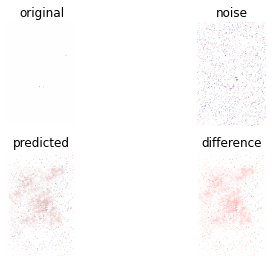

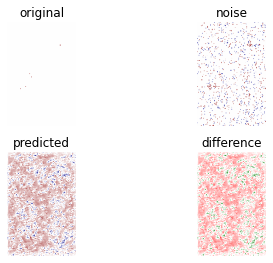

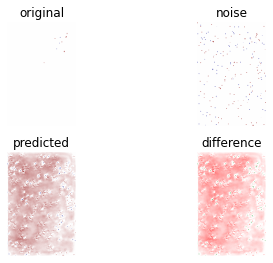

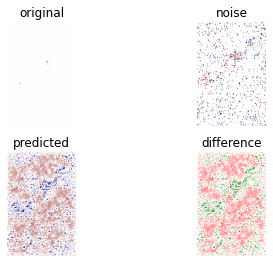

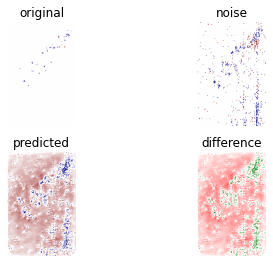

<Figure size 432x288 with 0 Axes>

In [76]:
test(dann_test)


100%|██████████| 33/33 [00:01<00:00, 19.36it/s]


test loader size: 65
loss of model: cdan is 2810.913330078125


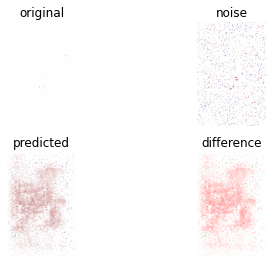

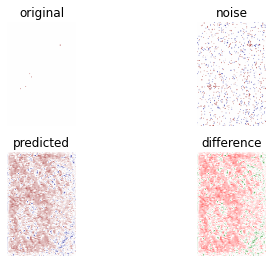

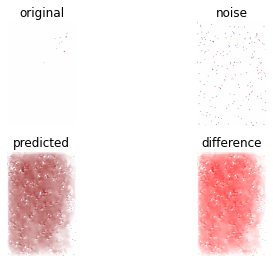

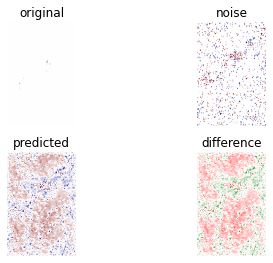

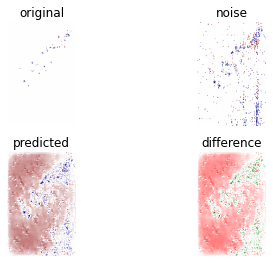

<Figure size 432x288 with 0 Axes>

In [77]:
test(cdan_test)



100%|██████████| 33/33 [00:01<00:00, 20.23it/s]


test loader size: 65
loss of model: cdan_e is 9293.9931640625


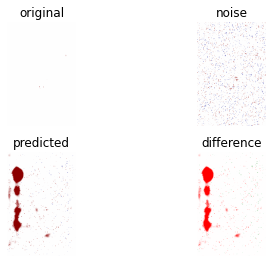

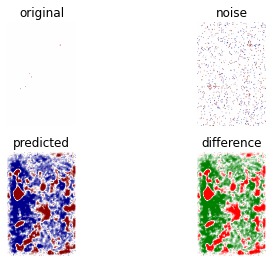

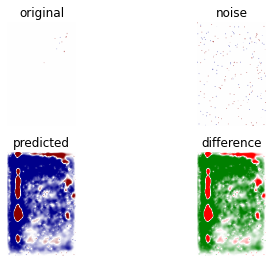

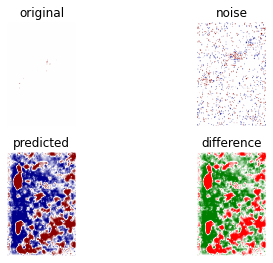

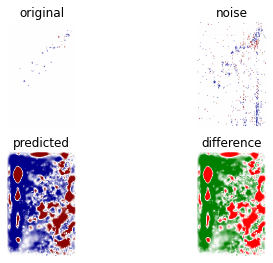

<Figure size 432x288 with 0 Axes>

In [78]:
test(cdan_e_test)


load from:  /root/autoencoder_denoiser/exps/results_4.13_solved_iterator_bug/baseline/latest_model.pt
model :UNet


100%|██████████| 33/33 [00:01<00:00, 26.58it/s]


test loader size: 65
loss of model: baseline is 146.54360961914062


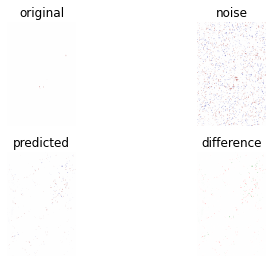

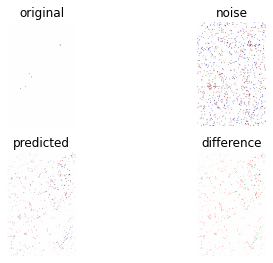

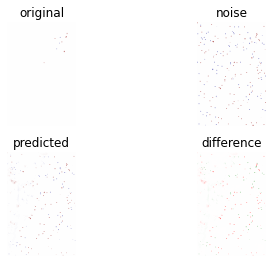

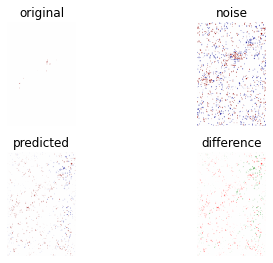

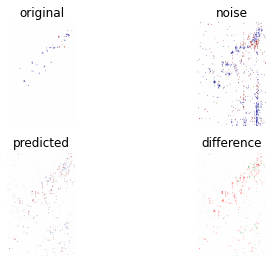

<Figure size 432x288 with 0 Axes>

In [79]:
baseline_test = Test('baseline', config_path='/root/autoencoder_denoiser/configs_4.13_solved_iterator_bug',
                     exp_dir='/root/autoencoder_denoiser/exps/results_4.13_solved_iterator_bug')
test(baseline_test)

In [ ]:
# my_model_test = Test("t1_03")
baseline_test = Test('paper_1d', config_path='/root/autoencoder_denoiser/configs',
                     exp_dir='/root/autoencoder_denoiser/exps/results_4.13_solved_iterator_bug')
test(baseline_test)
# paper_1d_test = Test("paper_1d")

model :UNet
model: Unet config as the paper indicated)


In [ ]:
# def loop_iterable(iterable):
#     while True:
#         yield from iterable
# a=  (loop_iterable([1,2,3,4,5]))


In [ ]:
# a = zip([1,2],3,4,5,6])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1649538742.py, line 1)

In [ ]:
# next(a)

2

In [ ]:
# import json, torch
# f = open('/root/autoencoder_denoiser/configs/'+ 't1_03' + '.json')
# config = json.load(f)

# state_dict = torch.load('/root/autoencoder_denoiser/results_new_SNR/t1_03/latest_model.pt')
# model = get_model(config)
# model = torch.nn.DataParallel(model)
# model.load_state_dict(state_dict['model'])

# torch.save(model.module.state_dict(), '/root/autoencoder_denoiser/results_new_SNR/t1_03/latest_model_weight.pt') 

model :UNet


In [ ]:
def tt(*nums):
    for n in nums:
        print(n**2)
        
tt(12,23)

144
529
